<a href="https://colab.research.google.com/github/ysun155/spatial-temporal-data-science-research/blob/main/Cycleway_Coordinates_%26_GSV_Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Genertaing cycleway coordinates in open street map

In [ ]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json][timeout:25];
area["name"="Irvine"]->.boundaryarea;
( node["cycleway"](area.boundaryarea);
  way["cycleway"](area.boundaryarea);
  relation["cycleway"](area.boundaryarea);
);
out center;
"""

response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

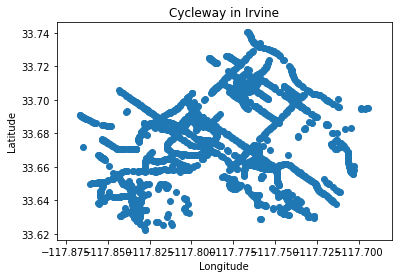

In [ ]:
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
    
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Cycleway in Irvine')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [ ]:
coords = np.flip(coords)
print(coords)

[[  33.7071157 -117.7653542]
 [  33.6958001 -117.7341174]
 [  33.6955276 -117.7339961]
 ...
 [  33.6671994 -117.8055183]
 [  33.6542105 -117.7569843]
 [  33.7099936 -117.7679081]]


In [ ]:
column_values = ['Latitude', 'Longitude']
df = pd.DataFrame(data = coords, 
                  columns = column_values)

print(df)

       Latitude   Longitude
0     33.707116 -117.765354
1     33.695800 -117.734117
2     33.695528 -117.733996
3     33.695820 -117.734420
4     33.675693 -117.852333
...         ...         ...
2364  33.645958 -117.835691
2365  33.722363 -117.754256
2366  33.667199 -117.805518
2367  33.654210 -117.756984
2368  33.709994 -117.767908

[2369 rows x 2 columns]


In [ ]:
len(df)

2369

#Downloading street view images metadata

In [ ]:
!pip install git+https://github.com/robolyst/streetview

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/robolyst/streetview to /tmp/pip-req-build-8iole7t_
  Running command git clone -q https://github.com/robolyst/streetview /tmp/pip-req-build-8iole7t_
  Created wheel for streetview: filename=streetview-0.1-py3-none-any.whl size=5559 sha256=f6a87f460f4bbec61c9073de65cbfba4c59afbed79c82721911ada6f03a45ab4
  Stored in directory: /tmp/pip-ephem-wheel-cache-faaz9vyt/wheels/66/29/d5/10e85c6bce2a6b608b12aacf7f661be4969781e1c001060857
Successfully built streetview


In [ ]:
import streetview
column_names = ['lat', 'lon', 'month', 'panoid', 'year', 'num', 'empty']
metadata = pd.DataFrame(columns = column_names)
num = 0
while num < len(df):
  #lat = df.loc[num, 'Latitude']
  #lon = df.loc[num, 'Longitude']
  panoids = streetview.panoids(lat = df.loc[num, 'Latitude'], lon = df.loc[num, 'Longitude'])
  if panoids == []:
    metadata = metadata.append({'lat':df.loc[num, 'Latitude'], 'lon':df.loc[num, 'Longitude'], 'empty': 'True'}, ignore_index = True)
  else:
    for dic in panoids:
      dic['num'] = num
    metadata = metadata.append(panoids)
  num += 1

In [ ]:
metadata

,lat,lon,month,panoid,year,num,empty
0,33.707167,-117.765389,7.0,XWyA5fFJ4qg7i4q5BKGSOw,2011.0,0,NaN
1,33.707111,-117.765417,4.0,wzQ5HcOnqiMoVnL2L4U3HQ,2012.0,0,NaN
2,33.707144,-117.765419,4.0,V2i_zC4V1bTwmozfeTJThg,2015.0,0,NaN
3,33.707123,-117.765438,11.0,MgAK-XjiYbcHOJmKbDCHXg,2015.0,0,NaN
4,33.707133,-117.765402,7.0,Xa6YZvYrviiohiMOMg76Vg,2017.0,0,NaN
...,...,...,...,...,...,...,...
23,33.713062,-117.770865,NaN,973kvXaP8g52owbhd_B92g,NaN,651,NaN
24,33.712997,-117.770930,NaN,EEpaesScHz6775iKvLFtcQ,NaN,651,NaN
25,33.712930,-117.770996,NaN,bwGvjpawToQ6jD67sp1pKQ,NaN,651,NaN
26,33.713041,-117.770766,NaN,4ct2V4LkMfWf4LCPUXmGSA,NaN,651,NaN


In [ ]:
metadata.to_csv('raw_metadata.csv')

In [ ]:
cleaned_metadata = metadata.drop_duplicates(subset ="panoid",keep='first')
cleaned_metadata

In [ ]:
cleaned_metadata = cleaned_metadata.loc[cleaned_metadata["empty"] != "True"]

In [ ]:
cleaned_metadata

In [ ]:
cleaned_metadata.to_csv('cleaned_withNaN_metadata.csv')

In [ ]:
without_nan = cleaned_metadata[cleaned_metadata['month'].notna()]

without_nan

In [ ]:
without_nan = cleaned_metadata[cleaned_metadata['year'].notna()]

without_nan

,lat,lon,month,panoid,year,num,empty
0,33.707167,-117.765389,7.0,XWyA5fFJ4qg7i4q5BKGSOw,2011.0,0,NaN
1,33.707111,-117.765417,4.0,wzQ5HcOnqiMoVnL2L4U3HQ,2012.0,0,NaN
2,33.707144,-117.765419,4.0,V2i_zC4V1bTwmozfeTJThg,2015.0,0,NaN
3,33.707123,-117.765438,11.0,MgAK-XjiYbcHOJmKbDCHXg,2015.0,0,NaN
4,33.707133,-117.765402,7.0,Xa6YZvYrviiohiMOMg76Vg,2017.0,0,NaN
...,...,...,...,...,...,...,...
1,33.712721,-117.771064,5.0,Ky2bz9VLMW-4fWutXP3Kzw,2016.0,651,NaN
2,33.712750,-117.771059,8.0,UX6n2nV49KWsYkp_p8Sf_A,2017.0,651,NaN
3,33.712757,-117.771041,1.0,Plg4OIG8mtwqbPYWyyLlLw,2018.0,651,NaN
4,33.712732,-117.771051,2.0,mV7l6SVbzJWyGuPCHrDkqg,2019.0,651,NaN


In [ ]:
without_nan.to_csv('cleaned_withoutNaN_metadata.csv')

In [ ]:
df = without_nan
df.head(20)

,lat,lon,month,panoid,year,num,empty
0,33.707167,-117.765389,7.0,XWyA5fFJ4qg7i4q5BKGSOw,2011.0,0,NaN
1,33.707111,-117.765417,4.0,wzQ5HcOnqiMoVnL2L4U3HQ,2012.0,0,NaN
2,33.707144,-117.765419,4.0,V2i_zC4V1bTwmozfeTJThg,2015.0,0,NaN
3,33.707123,-117.765438,11.0,MgAK-XjiYbcHOJmKbDCHXg,2015.0,0,NaN
4,33.707133,-117.765402,7.0,Xa6YZvYrviiohiMOMg76Vg,2017.0,0,NaN
5,33.707120,-117.765426,12.0,c8lj-qgpn0mnkB0cMkntGQ,2017.0,0,NaN
6,33.707113,-117.765405,2.0,RbccCCSUmdjiGHHX9lQxkw,2018.0,0,NaN
7,33.707122,-117.765449,5.0,TJMsBPu6Eep7wNeMekX1MQ,2018.0,0,NaN
8,33.707113,-117.765419,2.0,xDvDiPbXOqC0PmoR90oFjQ,2021.0,0,NaN
9,33.707138,-117.765415,6.0,LvSE_czNcW2qvOsfkDg8RA,2022.0,0,NaN
